# Map detected galaxies after 15, 20, 25 years

###  Chiara Mingarelli,  mingarelli@gmail.com, simulation curves from J. A. Ellis

In [1]:
#!/usr/bin/env python
from __future__ import division
import sys, os
import math
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin, log10
import healpy as hp
import plot_mpl2
import collections
from io import StringIO

from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# plotting preamble (credit J. Ellis)

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

In [3]:
# simulated CW curves (white noise)
sim1a = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.05_T_15.txt") # 2sigma, DP=0.95, 15 yrs
sim2b = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.05_T_20.txt") # 2sigma, DP=0.95, 20 yrs
sim3c = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.05_T_25.txt") # 2sigma, DP=0.95, 25 yrs

sim1d = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.003_T_15.txt") # 3sigma, DP=0.95, 15 yrs
sim2e = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.003_T_20.txt") # 3sigma, DP=0.95, 20 yrs
sim3f = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.003_T_25.txt") # 3sigma, DP=0.95, 25 yrs

sim1g = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.0001_T_15.txt") # 1e-4, DP=0.95, 15 yrs
sim2h = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.0001_T_20.txt") # 1e-4, DP=0.95, 20 yrs
sim3i = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.0001_T_25.txt") # 1e-4, DP=0.95, 25 yrs

In [4]:
# simulated frequency and strain
simStrain1 = sim1a[:,1] # 15 yrs, 0 red noise, 2sigma
simFreq1 = sim1a[:,0]
simStrain2 = sim2b[:,1] # 20 yrs, 0 red noise, 2sigma
simFreq2 = sim2b[:,0]
simStrain3 = sim3c[:,1] # 25 yrs, 0 red noise, 2sigma
simFreq3 = sim3c[:,0]

simStrain4 = sim1d[:,1] # 15 yrs, 0 red noise, 3 sigma
simFreq4 = sim1d[:,0]
simStrain5 = sim2e[:,1] # 20 yrs, 0 red noise, 3 sigma
simFreq5 = sim2e[:,0]
simStrain6 = sim3f[:,1] # 25 yrs, 0 red noise, 3 sigma
simFreq6 = sim3f[:,0]

simStrain7 = sim1g[:,1] # 15 yrs, 0 red noise, 1e-4
simFreq7 = sim1g[:,0]
simStrain8 = sim2h[:,1] # 20 yrs, 0 red noise, 1e-4
simFreq8 = sim2h[:,0]
simStrain9 = sim3i[:,1] # 25 yrs, 0 red noise, 1e-4
simFreq9 = sim3i[:,0]



In [5]:
# RA_tot, DEC_tot, gw_freq_vec, strain_vec, mchirp_rec, q_rec, gal_cat_name, dist_list, mstar_list, save_p, 
# gal_choice, T_z_list, mergRate_list, t2c_list, z_list, r_inf_list, friction_list, hardening_list, num_zeros

In [6]:
# simulated CW curves (red noise right now)
Rsim1a = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.05_T_15.txt") # 2sigma, DP=0.95, 15 yrs
Rsim2b = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.05_T_20.txt") # 2sigma, DP=0.95, 20 yrs
Rsim3c = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.05_T_25.txt") # 2sigma, DP=0.95, 25 yrs

Rsim1d = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.003_T_15.txt") # 3sigma, DP=0.95, 15 yrs
Rsim2e = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.003_T_20.txt") # 3sigma, DP=0.95, 20 yrs
Rsim3f = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.003_T_25.txt") # 3sigma, DP=0.95, 25 yrs

Rsim1g = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.0001_T_15.txt") # 1e-4, DP=0.95, 15 yrs
Rsim2h = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.0001_T_20.txt") # 1e-4, DP=0.95, 20 yrs
Rsim3i = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.0001_T_25.txt") # 1e-4, DP=0.95, 25 yrs

# simulated frequency and strain
RsimStrain1 = Rsim1a[:,1] # 15 yrs, 0 red noise, 2sigma
RsimFreq1 = Rsim1a[:,0]
RsimStrain2 = Rsim2b[:,1] # 20 yrs, 0 red noise, 2sigma
RsimFreq2 = Rsim2b[:,0]
RsimStrain3 = Rsim3c[:,1] # 25 yrs, 0 red noise, 2sigma
RsimFreq3 = Rsim3c[:,0]

RsimStrain4 = Rsim1d[:,1] # 15 yrs, 0 red noise, 3 sigma
RsimFreq4 = Rsim1d[:,0]
RsimStrain5 = Rsim2e[:,1] # 20 yrs, 0 red noise, 3 sigma
RsimFreq5 = Rsim2e[:,0]
RsimStrain6 = Rsim3f[:,1] # 25 yrs, 0 red noise, 3 sigma
RsimFreq6 = Rsim3f[:,0]

RsimStrain7 = Rsim1g[:,1] # 15 yrs, 0 red noise, 1e-4
RsimFreq7 = Rsim1g[:,0]
RsimStrain8 = Rsim2h[:,1] # 20 yrs, 0 red noise, 1e-4
RsimFreq8 = Rsim2h[:,0]
RsimStrain9 = Rsim3i[:,1] # 25 yrs, 0 red noise, 1e-4
RsimFreq9 = Rsim3i[:,0]


In [7]:
#get data from all realizations
data_filename = "../../fake_data/MM13_big_test.txt"

count = 0 #variable used to count number of sources per realization
file_s = [] #numbers of sources per relaization
RA_all = []
DEC_all = []
freq_all = []
strain_all = []
gal_name_all = []
pi_all = []
lum_all = []
q_all = []
dist_all = []
mc_all = []


#temps used to help seperate data by relalization
temp_RA = []
temp_DEC = []
temp_freq = []
temp_strain = []
temp_file_s = []
temp_gal_name = []
temp_pi = []
temp_lum = []
temp_q = []
temp_dist = []
temp_mc = []

with open(data_filename) as f:
    
    temp_RA = []
    temp_DEC = []
    temp_freq = []
    temp_strain = []
    temp_gal_name = []
    temp_pi = []
    temp_lum = []
    temp_q = []
    temp_dist = []
    temp_mc = []
    
    for line in f:
        if len(line) < 50:
            
            #add the collected data to the real lists
            
            file_s.append(count)
            RA_all.append(temp_RA) #phi, add pi to this for healpix maps
            DEC_all.append(temp_DEC) #theta
            freq_all.append(temp_freq)
            strain_all.append(temp_strain)
            gal_name_all.append(temp_gal_name)
            pi_all.append(temp_pi)
            lum_all.append(temp_lum)
            q_all.append(temp_q)
            dist_all.append(temp_dist)
            mc_all.append(temp_mc)

            
            #reset the temp lists
            
            temp_RA = []
            temp_DEC = []
            temp_freq = []
            temp_strain = []
            temp_gal_name = []
            temp_pi = []
            temp_lum = []
            temp_q = []
            temp_dist = []
            temp_mc = []
            count = 0
            
        else:
            
            #data is split into its corresponding lists
            
            splitted = line.split(" ") 
    
            temp_RA.append(float(splitted[0])) #phi, add pi to this for healpix maps
            temp_DEC.append(float(splitted[1])) #theta
            temp_freq.append(float(splitted[2]))
            temp_strain.append(float(splitted[3]))
            temp_gal_name.append(str(splitted[6]))
            temp_pi.append(float(splitted[9]))
            temp_lum.append(float(splitted[8]))
            temp_q.append(float(splitted[5]))
            temp_dist.append(float(splitted[7]))
            temp_mc.append(float(splitted[4]))
            count+=1
            
            
#adding final realization
file_s.append(count)
RA_all.append(temp_RA) #phi, add pi to this for healpix maps
DEC_all.append(temp_DEC) #theta
freq_all.append(temp_freq)
strain_all.append(temp_strain)
gal_name_all.append(temp_gal_name)
pi_all.append(temp_pi)
lum_all.append(temp_lum)
q_all.append(temp_q)
dist_all.append(temp_dist)
mc_all.append(temp_mc)                           



#deleting intial empty array ex) stall = [[], [2], [3]] --> [[2], [3]]
file_s = file_s[1:]
RA_all = RA_all[1:]
DEC_all = DEC_all[1:]
freq_all = freq_all[1:]
strain_all = strain_all[1:]
gal_name_all = gal_name_all[1:]
pi_all = pi_all[1:]
lum_all = lum_all[1:]
q_all = q_all[1:]
dist_all = dist_all[1:]
mc_all = mc_all[1:]



In [8]:
"""ONLY THE LOUDEST"""
# points for one sky
final_file = np.genfromtxt("../../detectedSkies/final_skies/mm13_mbul_final_test0126.txt")
final_strain = final_file[:,8]
loudest_filename = final_file[:,9]
local_index = final_strain.argmax()
loudest_index = int(loudest_filename[local_index])
print(loudest_index)



allF_loudest = []
allS_loudest = []
allMc_loudest = []
allQ_loudest = []
allPi_loudest = []
allLum_loudest = []
all_name_loudest = []
allD_loudest = []

# condensed here for an exmple realization
allF_loudest.append(freq_all[loudest_index])
allS_loudest.append(strain_all[loudest_index])
allMc_loudest.append(mc_all[loudest_index])
allQ_loudest.append(q_all[loudest_index])
allD_loudest.append(dist_all[loudest_index])
allLum_loudest.append(lum_all[loudest_index]) 
allPi_loudest.append(pi_all[loudest_index])
all_name_loudest.append(gal_name_all[loudest_index])

1140


In [9]:
all_name_loudest

[['NGC1004',
  'UGC07410',
  'NGC0900',
  'PGC200538',
  '2MASXJ1326221',
  'PGC323807',
  'PGC829883',
  'PGC181313',
  'ESO265-027',
  'PGC046101',
  'PGC1396460',
  '6dFJ1921352-2',
  'PGC027107',
  'IC0542',
  'NGC1583',
  'PGC005031',
  'PGC072224',
  'PGC018579',
  'NGC5769',
  'NGC1765',
  'NGC7728',
  'PGC043036',
  'ESO291-020',
  'PGC044107',
  'NGC6876',
  'NGC3713',
  'PGC053918',
  'IC1849',
  'PGC020641',
  'ESO342-008',
  'PGC095507',
  'PGC031116',
  'PGC3088963',
  'UGC01504',
  'ESO253-015',
  'ESO386-014',
  '2MASXJ2235476',
  'PGC919208',
  'PGC3097003',
  'PGC200396',
  'IC2441',
  'PGC054804',
  'PGC056587',
  'PGC3097046',
  'IC0575',
  'PGC160856',
  'PGC135251',
  'PGC1125670',
  'PGC053982',
  'ESO215-010',
  'PGC3089639',
  'PGC3080790',
  'UGC00902',
  'NGC6163',
  'PGC1025931',
  'PGC028802',
  'NGC0756',
  'PGC013228',
  'PGC054744',
  'UGC01318',
  'NGC3411',
  'NGC0813',
  'PGC093999',
  'PGC3091412',
  'NGC1316',
  'PGC048213',
  'PGC3084875',
  'PGC020

In [10]:
all_name = np.array(gal_name_all)
all_name.shape

(1218,)

# Which sources can be detected with simulated IPTA curves?


In [11]:
# Sources above curve?

In [12]:
def find_nearest(array,value):
    # http://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
    idx = (np.abs(array-value)).argmin()
    return idx #return index of array

In [13]:
# New sims used below

In [14]:
# Sources detected the most timesd ("Hit List")

In [20]:
def find_detected_sr(simFreq,simStrain):
    iptaDetectedF = []
    iptaDetectedS = []
    iptaDetectedN = []
    iptaDetectedMc = []
    iptaDetectedQ = []
    iptaDetectedPi = []
    iptaDetectedLum = []
    iptaDetectedDist = []

    for i in range(len(freq_all)):
        for j in range(len(freq_all[i])):
            compareFreq = find_nearest(simFreq, freq_all[i][j]) # find the closest freq in inteprolated values to source freq, report index
            simStrainX = simStrain[compareFreq] # what is the strain of that source?
            if strain_all[i][j] > simStrainX: # can we detect that source?
                
                iptaDetectedF.append(freq_all[i][j]) # add it to a detected list
                iptaDetectedS.append(strain_all[i][j]) 
                iptaDetectedN.append(all_name[i][j]) 
                iptaDetectedMc.append(mc_all[i][j]) 
                iptaDetectedQ.append(q_all[i][j]) 
                iptaDetectedPi.append(pi_all[i][j]) 
                iptaDetectedLum.append(lum_all[i][j]) 
                iptaDetectedDist.append(dist_all[i][j])
    print(iptaDetectedN)
    return iptaDetectedF, iptaDetectedS, iptaDetectedN, iptaDetectedMc, iptaDetectedQ, iptaDetectedPi, iptaDetectedLum, iptaDetectedDist

In [21]:
# 15 yrs white noise,  2 sigma
iptaDetectedF, iptaDetectedS, iptaDetectedN, iptaDetectedMc, iptaDetectedQ, iptaDetectedPi, iptaDetectedLum, \
iptaDetectedDist = find_detected_sr(simFreq1,simStrain1)

# 15 yrs white noise,  3 sigma
iptaDetectedF4, iptaDetectedS4, iptaDetectedN4, iptaDetectedMc4, iptaDetectedQ4, iptaDetectedPi4, iptaDetectedLum4, \
iptaDetectedDist4 = find_detected_sr(simFreq4,simStrain4)
            
# 15 yrs white noise, 1e-4, 3.9 sigma
iptaDetectedF7, iptaDetectedS7, iptaDetectedN7, iptaDetectedMc7, iptaDetectedQ7, iptaDetectedPi7, iptaDetectedLum7, \
iptaDetectedDist7 = find_detected_sr(simFreq7,simStrain7)

['UGC00621', 'NGC3115', 'NGC3115', 'NGC0890', 'ESO528-019', 'NGC5101', 'NGC4649', 'NGC7562', 'PGC2793346', 'IC1459', 'NGC3115', 'NGC3115', 'PGC065597', 'NGC3115', 'NGC1399', 'ESO284-053', 'NGC3158', 'NGC6876', 'NGC4382', 'NGC1277', 'NGC1316', 'NGC1275', 'NGC1316']
['NGC5101', 'PGC2793346', 'IC1459', 'PGC065597', 'NGC3115', 'ESO284-053', 'NGC4382', 'NGC1277', 'NGC1316', 'NGC1275', 'NGC1316']
['IC1459', 'PGC065597', 'NGC3115', 'NGC4382', 'NGC1316', 'NGC1275', 'NGC1316']


In [22]:
# 20 yrs white noise, 2 sigma
iptaDetectedF2, iptaDetectedS2, iptaDetectedN2, iptaDetectedMc2, iptaDetectedQ2, iptaDetectedPi2, iptaDetectedLum2, \
iptaDetectedDist2 = find_detected_sr(simFreq2,simStrain2)
                        
# 20 yrs white noise, 3 sigma
iptaDetectedF5, iptaDetectedS5, iptaDetectedN5, iptaDetectedMc5, iptaDetectedQ5, iptaDetectedPi5, iptaDetectedLum5, \
iptaDetectedDist5 = find_detected_sr(simFreq5,simStrain5)
        
# 20 yrs white noise, 1e-4 sigma
iptaDetectedF8, iptaDetectedS8, iptaDetectedN8, iptaDetectedMc8, iptaDetectedQ8, iptaDetectedPi8, iptaDetectedLum8, \
iptaDetectedDist8 = find_detected_sr(simFreq8,simStrain8)

['NGC1332', 'IC0659', '2MASXJ2024063', 'UGC00621', 'NGC5111', 'PGC054671', 'ESO306-017', 'NGC3115', 'NGC7265', 'IC4926', 'NGC5090', 'NGC4760', 'NGC6203', 'PGC031277', 'NGC3557', 'NGC5322', 'NGC3115', 'IC4255', 'UGC01684', 'NGC7618', 'NGC5084', 'NGC0524', 'PGC3093211', 'PGC3076997', 'NGC6240', 'NGC3115', 'PGC2065632', 'PGC025055', 'NGC1505', 'NGC0890', 'IC1459', 'NGC3886', 'ESO528-019', 'PGC021993', 'NGC7213', 'NGC4526', 'NGC3937', 'ESO488-027', 'PGC016867', 'A3565BCG', 'NGC6454', 'PGC101257', 'PGC068799', 'PGC165939', 'PGC030503', 'NGC7242', 'NGC3115', 'NGC5101', 'NGC2320', 'NGC5846', 'NGC6893', 'NGC6935', 'NGC1316', 'NGC6251', 'NGC0507', '2MASXJ0209257', 'ESO462-015', '2MASXJ2020022', 'IC4350', 'NGC3115', 'NGC6816', 'ESO121-028', 'NGC3923', 'NGC7123', 'NGC4594', 'PGC075991', 'NGC4594', 'NGC4594', 'NGC0128', 'ESO323-077', 'NGC4382', 'PGC062122', 'PGC033000', 'NGC2746', 'NGC4472', 'ESO280-007', 'UGC03792', 'IC4815', 'PGC045227', 'NGC4645A', 'PGC000320', 'PGC1281329', 'PGC065215', 'NGC08

In [23]:
# 25 yrs white noise, 2 sigma
iptaDetectedF3, iptaDetectedS3, iptaDetectedN3, iptaDetectedMc3, iptaDetectedQ3, iptaDetectedPi3, iptaDetectedLum3, \
iptaDetectedDist3 = find_detected_sr(simFreq3,simStrain3)
        
# 25 yrs white noise, 3 sigma
iptaDetectedF6, iptaDetectedS6, iptaDetectedN6, iptaDetectedMc6, iptaDetectedQ6, iptaDetectedPi6, iptaDetectedLum6, \
iptaDetectedDist6 = find_detected_sr(simFreq6,simStrain6)
            
# 25 yrs white noise, 1e-4 sigma
iptaDetectedF9, iptaDetectedS9, iptaDetectedN9, iptaDetectedMc9, iptaDetectedQ9, iptaDetectedPi9, iptaDetectedLum9, \
iptaDetectedDist9 = find_detected_sr(simFreq9,simStrain9)


['NGC2943', 'NGC0499', 'NGC1332', 'UGC02469', 'NGC4767', 'NGC7123', 'UGC03646', 'ESO187-027', 'PGC062623', 'NGC3348', 'PGC062122', 'IC0659', 'PGC067586', 'NGC1600', 'NGC7792', 'NGC6370', 'PGC063597', 'PGC053321', 'PGC3091666', 'IC5357', 'ESO306-009', 'PGC059596', 'PGC3091558', 'UGC01142', '2MASXJ2024063', 'PGC1704186', 'PGC209223', 'PGC010561', 'UGC00621', 'PGC2394629', 'ESO511-023', 'NGC7284', 'NGC4594', 'NGC5111', 'PGC017599', 'NGC5071', 'NGC4594', 'PGC037887', 'PGC019264', 'PGC054671', 'UGC01213', 'NGC1275', 'PGC431994', 'IC4261', 'ESO216-005', 'NGC5208', 'NGC0547', 'NGC5101', 'NGC3557', 'NGC1066', 'IC0034', 'UGC03683', 'ESO306-017', 'PGC3097094', 'NGC3115', 'NGC7265', 'NGC7469', 'PGC061186', 'IC4926', 'PGC050790', 'NGC5090', 'NGC0708', 'PGC018237', 'NGC6483', 'NGC1060', 'PGC214704', 'PGC130517', 'IC4329', 'ESO075-043', 'ESO323-034', 'IC5250B', 'NGC4760', 'NGC3771', 'PGC132404', 'PGC061170', 'NGC3562', 'NGC4895', 'NGC5322', 'ESO581-003', 'NGC7049', 'NGC6776', '2MASXJ0609056', 'NGC62

['NGC1332', 'NGC3348', 'PGC062122', 'IC0659', 'NGC6370', 'IC5357', 'ESO306-009', 'PGC059596', '2MASXJ2024063', 'PGC209223', 'UGC00621', 'NGC4594', 'NGC5111', 'PGC054671', 'UGC01213', 'NGC5101', 'ESO306-017', 'NGC3115', 'NGC7265', 'IC4926', 'NGC5090', 'NGC0708', 'NGC1060', 'NGC4760', 'NGC3562', 'NGC5322', 'NGC7049', '2MASXJ0609056', 'PGC132499', 'NGC5557', 'PGC031277', 'NGC3557', 'NGC6850', 'NGC5322', 'NGC4594', 'NGC0050', 'NGC3115', 'IC4255', 'IC5088', 'UGC01684', 'NGC7618', 'NGC5084', 'NGC0524', 'PGC3093211', 'PGC3076997', 'NGC6240', 'PGC046656', 'NGC3115', 'PGC2065632', 'PGC025055', 'NGC1505', 'NGC0890', 'NGC4594', 'NGC6868', 'IC1459', 'IC4261', 'NGC3886', 'PGC062122', 'UGC04972', 'NGC6903', 'ESO528-019', 'PGC021993', 'NGC5018', 'NGC7213', 'NGC4526', 'NGC6812', 'PGC2793386', 'PGC011389', 'NGC4686', 'NGC3937', 'ESO488-027', 'PGC016867', 'NGC4594', 'UGC03355', 'A3565BCG', 'NGC6454', 'PGC161869', 'PGC3097105', 'NGC4472', 'NGC5090', 'PGC068799', 'PGC053913', 'NGC3661', 'PGC030503', 'PGC1

In [24]:
# 25 yrs RED noise, 3 sigma
RiptaDetectedF6, RiptaDetectedS6, RiptaDetectedN6, RiptaDetectedMc6, RiptaDetectedQ6, RiptaDetectedPi6, RiptaDetectedLum6, \
RiptaDetectedDist6 = find_detected_sr(RsimFreq6,RsimStrain6)

['NGC0890', 'PGC065597', 'NGC3115', 'NGC4374', 'NGC4382', 'NGC1316', 'NGC1275', 'NGC1316']


In [25]:
RiptaDetectedF1, RiptaDetectedS1, RiptaDetectedN1, RiptaDetectedMc1, RiptaDetectedQ1, RiptaDetectedPi1, RiptaDetectedLum1, \
RiptaDetectedDist1 = find_detected_sr(RsimFreq1,RsimStrain1)

['NGC3115', 'NGC4382', 'NGC1316']


In [26]:
RiptaDetectedF2, RiptaDetectedS2, RiptaDetectedN2, RiptaDetectedMc2, RiptaDetectedQ2, RiptaDetectedPi2, RiptaDetectedLum2, \
RiptaDetectedDist2 = find_detected_sr(RsimFreq2,RsimStrain2)

['NGC0890', 'NGC7562', 'PGC065597', 'NGC3115', 'PGC095527', 'NGC4374', 'NGC4382', 'NGC1316', 'NGC1275', 'NGC1316', 'NGC1700']


In [27]:
RiptaDetectedF3, RiptaDetectedS3, RiptaDetectedN3, RiptaDetectedMc3, RiptaDetectedQ3, RiptaDetectedPi3, RiptaDetectedLum3, \
RiptaDetectedDist3 = find_detected_sr(RsimFreq3,RsimStrain3)

['NGC5084', 'NGC0890', 'ESO528-019', 'ESO323-077', 'NGC7562', 'IC1459', 'PGC065597', 'NGC3115', 'PGC095527', 'NGC4374', 'NGC1399', 'ESO284-053', 'NGC4382', 'NGC1316', 'NGC1275', 'NGC1316', 'NGC1700']


In [28]:
num_realizations = len(RA_all)

#15 years
print(len(iptaDetectedF))
print(len(iptaDetectedF4))
print(len(iptaDetectedF7))

print("")

#20 years
print(len(iptaDetectedF2))
print(len(iptaDetectedF5))
print(len(iptaDetectedF8))

print("")

#25 years
print(len(iptaDetectedF3))
print(len(iptaDetectedF6))
print(len(iptaDetectedF9))

print("")

#15 years
print((len(iptaDetectedF))/num_realizations)
print((len(iptaDetectedF4))/num_realizations)
print((len(iptaDetectedF7))/num_realizations)

print("")

#20 years
print((len(iptaDetectedF2)) /num_realizations)
print((len(iptaDetectedF5))/num_realizations)
print((len(iptaDetectedF8))/num_realizations)

print("")

#25 years
print((len(iptaDetectedF3))/num_realizations)
print((len(iptaDetectedF6))/num_realizations)
print((len(iptaDetectedF9))/num_realizations)

23
11
7

332
136
59

1556
629
366

0.018883415435139574
0.0090311986863711
0.005747126436781609

0.27257799671592775
0.1116584564860427
0.048440065681444995

1.277504105090312
0.5164203612479474
0.30049261083743845


# PLOTTING AND SORTING LISTS OF GALAXIES

In [29]:
#Example: How to ask how many times a galaxy was found, with NGC 4486

In [30]:
#white noise
catalog_list = iptaDetectedN6

#red_noise
#catalog_list = RiptaDetectedN6

In [31]:
histo_data = dict((x, catalog_list.count(x)) for x in catalog_list)
d = histo_data


In [32]:
# try using a sorted list

In [33]:
histo_data = sorted(histo_data.items(), key=lambda x:x[1]) # sort histogram by count


In [34]:
value = np.zeros([len(histo_data)])
label = []

for j in range(len(histo_data)):
    value[j] = histo_data[j][1]
    label.append(histo_data[j][0])

In [35]:
def find_gal_idx_4val(nameList, val):
    ans = [i for i, x in enumerate(nameList) if x >= val]
    return ans

In [36]:
value = value.tolist()

In [57]:
# What is the minimum number of counts we are interested in for plotting?
minval = 5
goodCounts = find_gal_idx_4val(value, minval)

#want around 5-8 galaxies
goodCounts

[430, 431, 432, 433, 434, 435, 436, 437, 438]

In [58]:
toPlot_val = value[goodCounts[0]:goodCounts[-1]+1]
toPlot_name = label[goodCounts[0]:goodCounts[-1]+1]

toPlot_name 

['NGC3923',
 'NGC3311',
 'NGC4472',
 '2MASXJ2024063',
 'A3565BCG',
 'NGC4382',
 'NGC4374',
 'NGC3115',
 'NGC4594']

In [59]:
# RED NOISE SOURCES

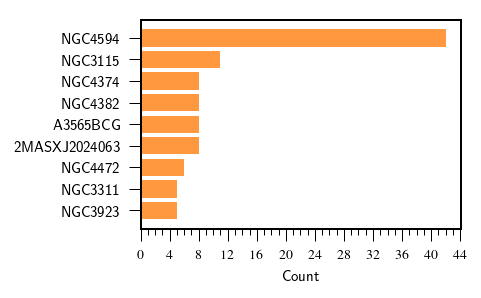

In [60]:
"""ONLY RUN WITH RED NOISE DATA"""
X = np.arange(len(toPlot_val))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(X, toPlot_val, alpha=0.8, linewidth = 0.4, color = "C1")
ax.set_yticks(X)
plt.setp(ax.get_yticklabels(), fontsize=7)
ax.set_yticklabels(toPlot_name)
majorLocator = MultipleLocator(4)
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#plt.xticks(np.arange(100,))
plt.xlabel("Count")
#plt.title("25 year dataset, FAP $3\sigma$, DP$=95\%$, Red Noise")
#plt.ylabel("Galaxy Name")
plt.tight_layout()
#plt.savefig("plots_sigma_114/step_5/RN_histList_3sigma_mm13_sig_114.pdf")

# PLOTTING FOR WHITE NOISE SOURCES

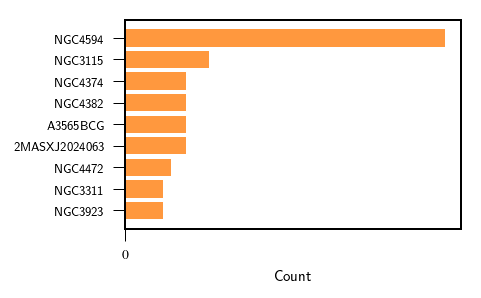

In [61]:
"""ONLY RUN WITH WHITE NOISE"""
X = np.arange(len(toPlot_val))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(X, toPlot_val, alpha=0.8, linewidth = 0.4, color="C1")
ax.set_yticks(X)
plt.setp(ax.get_yticklabels(), fontsize=6)
ax.set_yticklabels(toPlot_name)
majorLocator = MultipleLocator(450)
minorLocator = MultipleLocator(150)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#plt.xticks(np.arange(0,))
plt.xlabel("Count")
#plt.title("25 year dataset, FAP $3\sigma$, DP$=95\%$, White Noise")

#plt.ylabel("Galaxy Name")
plt.tight_layout()
#plt.savefig("WN_3sigma_20Mar17.pdf")
#plt.savefig("plots_bul_34/step_5/WN_3sigma_5_mm13_bul_ppt.pdf")

In [63]:
def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    # for nice looking bins
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

In [64]:
# detected sky realizations
sky_file = np.genfromtxt("../../detectedSkies/final_skies/mm13_mbul_final_test0126.txt",dtype=None)

detF = []
detS = []
for ii in range(len(sky_file)):
    detF.append(sky_file[ii][5])
    detS.append(sky_file[ii][6])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [65]:
# read in sensitivity curve. This is an upper limit curve, not a detection curve, needs to be updated
dataSB_W = np.genfromtxt("../SensWhole.dat",skip_header=1)#, dtype=float, sep="  ")

In [66]:
print(len(detF))

23


In [67]:
newF = []
newS = []
newMc = []

In [69]:
for j in range(len(freq_all)):
    newF.append(freq_all[j])
    newS.append(strain_all[j])
    newMc.append(mc_all[j])

In [70]:
flatF = [item for sublist in newF for item in sublist]
flatS = [item for sublist in newS for item in sublist]
flatMc = [item for sublist in newMc for item in sublist]

In [71]:
flatF[0]

2.2396068945668918e-09

In [72]:
index = detS.index(max(detS))
loudS = detS[index]
loudF = detF[index]
print(loudS, loudF)


0.9892430155714941 2114812265.5829716


# Comment and uncomment to make different FAP curves

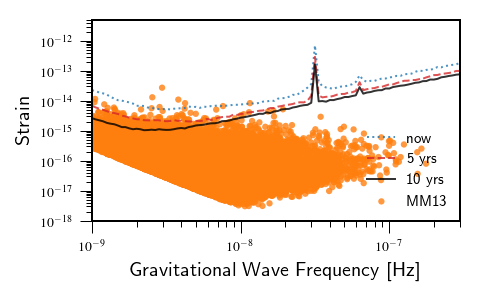

In [73]:
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(flatF, flatS, edgecolors='none', color='C1', alpha=0.8, s=10, rasterized=True, label = "MM13") #skies
#plt.scatter(detF, detS, edgecolors='none', color='C1', alpha=0.8, s=9, rasterized=True, label = "MM13") #skies
#plt.scatter(loudF, loudS, edgecolors='none', color='C3', alpha=0.8, s=10, rasterized=True) #skies



#plt.loglog(dataSB_W[:,0], dataSB_W[:, 1], color ='black') #sensitivity
#plt.loglog(dataSB_W[:,0], dataSB_W[:, 1], color ='black', label = 'Current EPTA') #sensitivity
# EPTA is really 7-18 yrs baselines up to 2014; Desvignes et al 2016

#plt.loglog(RsimFreq1,RsimStrain1,  label='15 yrs', lw = 1, linestyle = ":", color = 'C0',alpha = 0.8)#2sigma
#plt.loglog(simFreq4,simStrain4,  label='15 yrs', lw = 1, linestyle = ":", color = 'C0', alpha = 0.8)
plt.loglog(simFreq7,simStrain7,  label='now', lw = 1, linestyle = ":", color = 'C0', alpha = 0.8)


#plt.loglog(RsimFreq2,RsimStrain2,  label='20 yrs', lw = 1, linestyle = "--", color = 'C3',alpha = 0.8)#2sigma
#plt.loglog(simFreq5,simStrain5,  label='20 yrs', lw = 1, linestyle = "--", color = 'C3', alpha = 0.8)
plt.loglog(simFreq8,simStrain8,  label='5 yrs', lw = 1, linestyle = "--", color = 'C3', alpha = 0.8)


#plt.loglog(RsimFreq3,RsimStrain3,  label='25 yrs', lw = 1, linestyle = "-",  color = 'black',alpha = 0.8) #2sigma
#plt.loglog(simFreq6,simStrain6,  label='25 yrs', lw = 1, linestyle = "-", color = 'black', alpha = 0.8)
#plt.loglog(simFreq9,simStrain9,  label='25 yrs', lw = 1, linestyle = "-", color = 'black', alpha = 0.8) #1e-4
plt.loglog(simFreq9,simStrain9,  label='10 yrs', lw = 1, linestyle = "-", color = 'black', alpha = 0.8)


plt.xlim(1e-9,3e-7)
plt.ylim(1e-18, 5e-12)
plt.xlabel("Gravitational Wave Frequency [Hz]", size = "10")
plt.ylabel("Strain", size = "10")
plt.tight_layout() 
ax.legend(frameon = False, loc = "lower right")
#plt.title("Time to detection, 95$\%$ detection probability")
plt.legend(frameon=False,loc=4)
#plt.savefig("detectiontime_mm13_test.pdf", dpi=400, bbox_inches='tight')

#plt.title("MM13: Time to Detection")

#plt.savefig("single_1e-4_predictions_WN.pdf", dpi=400, bbox_inches='tight')

#color = '#1f77b4' (blue) , '#ff7f0e' (orange), '#2ca02c' (green), '#d62728' (red), #9467bd (purple)
#plt.savefig("plots_bul_34/step_5/loudest_detected_skies_detetcion_probability_mm13_ppt.pdf")






In [74]:
#Count how many are above the  epta line
count = 0
epta_strain = dataSB_W[:,1]
epta_freq = dataSB_W[:,0]

def find_nearest(array,value):
    # http://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array#
    idx = (np.abs(array-value)).argmin()
    return idx #return index of array

for i in range(len(detS)):
    ind = find_nearest(epta_freq, detF[i])
    if detS[i] > epta_strain[ind]:
        count+=1
        
#printed number is the number of sources ABOVE the epta strain line
print(count)

23


In [75]:
#get chirp mass for all points above the curve lines
strain_15 = simStrain7
freq_15 = simFreq7

strain_20 = simStrain8
freq_20 = simFreq8

strain_25 = simStrain9
freq_25 = simFreq9

mc_above = []


def find_nearest(array,value):
    # http://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array#
    idx = (np.abs(array-value)).argmin()
    return idx #return index of array

for i in range(len(flatS)):
    ind = find_nearest(freq_15, flatF[i])
    if flatS[i] > strain_15[ind]:
        mc_above.append(flatMc[i])



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


Text(8.13869,0.5,'Probability')

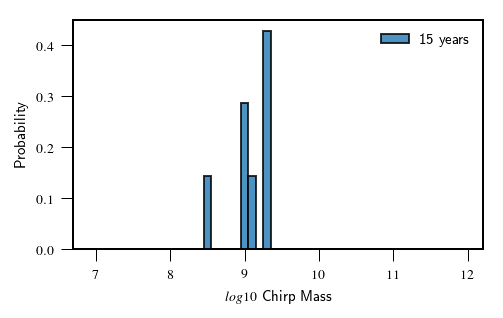

In [76]:
log_mc = np.log10(mc_above)

bin_list = auto_bin(0.1,7,12)

weights_mc = hist_weight(log_mc)
plt.hist(log_mc, bin_list, weights = weights_mc, alpha = 0.8, align='left', edgecolor = 'black', label = "15 years")

plt.legend(frameon=False)
plt.tight_layout()

plt.xlabel("$log10$ Chirp Mass")
plt.ylabel("Probability")
#plt.savefig("plots_bul_34/step_5/above_mc_distribution_bul_34.pdf")




In [ ]:
len(newS)

# Histograms for 25 yr detected skies

In [77]:
def find_gal_idx(nameList, name):
    ans = [i for i, x in enumerate(nameList) if x == name]
    return ans

def find_gal_dec_idx(nameList, dec):
    ans = [i for i, x in enumerate(nameList) if x >= dec]
    return ans

def find_gal_dec_idx_neg(nameList, dec):
    ans = [i for i, x in enumerate(nameList) if x <= dec]
    return ans

def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    #bin_size = 0.05; min_edge = -3.5; max_edge = -1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


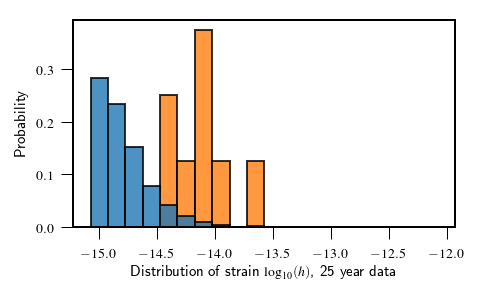

In [78]:
bin_list = auto_bin(0.15,-15,-12)
weights1 = hist_weight(np.log10(iptaDetectedS6))
weights2 = hist_weight(np.log10(RiptaDetectedS6))
plt.hist(np.log10(RiptaDetectedS6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         label = "red noise", color = "C1", weights = weights2)
plt.hist(np.log10(iptaDetectedS6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         label = "white noise", color = "C0", weights = weights1)
#plt.hist(np.log10(RiptaDetectedS6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
        # label = "red noise", color = "C1")

#plt.xlim(-9.7,-7.7)
plt.xlabel(r"Distribution of strain $\log_{10}(h)$, 25 year data")
plt.ylabel("Probability")
#plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig("plots_sigma_114/step_5/strain_distribution_mm13_sig_114.pdf")

In [79]:
print(RiptaDetectedS6)

[5.08115433150501e-15, 6.6588422682588715e-15, 8.332688738071618e-15, 5.2043628918674344e-15, 1.0953527251888386e-14, 1.3077413810011684e-14, 8.332987439910596e-15, 2.7350359381781402e-14]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


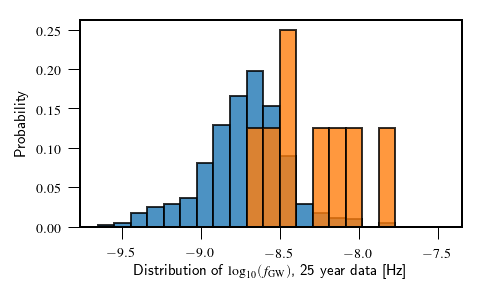

In [80]:
# What is the distribution of frequencies where sources were detected?
bin_list = auto_bin(0.1,-9.6,-7.4)
weights1 = hist_weight(np.log10(iptaDetectedF6))
weights2 = hist_weight(np.log10(RiptaDetectedF6))
plt.hist(np.log10(iptaDetectedF6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         weights = weights1 , label = "white noise")
plt.hist(np.log10(RiptaDetectedF6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         weights = weights2 , label = "red noise")
#plt.xlim(-9.7,-7.7)
plt.xlabel(r"Distribution of $\log_{10}(f_\mathrm{GW})$, 25 year data [Hz]")
plt.ylabel("Probability")
#plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("plots_sigma_114/step_5/frequency_distribution_sig_114.pdf")

In [81]:
max(mchirp_recLog2)

NameError: name 'mchirp_recLog2' is not defined

In [ ]:
mchirp_recLog2 = np.log10(RiptaDetectedMc6)
mchirp_recLog = np.log10(iptaDetectedMc6)

bin_list = auto_bin(.1,8.3,10.3)
weights1 = hist_weight(mchirp_recLog)
weights2 = hist_weight(mchirp_recLog2)

plt.hist(mchirp_recLog ,bin_list, align='left',  alpha=0.8, edgecolor = 'black', weights = weights1, \
        label = "white noise")
plt.hist(mchirp_recLog2 ,bin_list, align='left',  alpha=0.8, edgecolor = 'black', weights = weights2, \
        label = 'red noise')

plt.xlabel(r"Log Chirp Mass $\mathcal{M}_c$ $[M_\odot]$, 25 year data")
plt.ylabel("Probability")
#plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig("plots_sigma_114/step_5/chirp_mass_distribution_sig_114.pdf")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
bin_list = auto_bin(.05,.2,1)
weights1 = hist_weight(iptaDetectedQ6)
weights2 = hist_weight(RiptaDetectedQ6)

plt.hist(iptaDetectedQ6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights1,\
        label = "white noise")
plt.hist(RiptaDetectedQ6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights2, \
        label= 'red noise')

plt.xlabel(r"Mass Ratio ($q$), 25 year dataset ")
plt.ylabel("Probability")
plt.xlim(0.2,1.0)
majorLocator = MultipleLocator(.25)
minorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#plt.legend(frameon=False)
plt.tight_layout()

#plt.savefig("plots_sigma_114/step_5/mass_ratio_distribution_sig_114.pdf")

In [ ]:
ax = fig.add_subplot(111)
bin_list = auto_bin(.1,-27,-24.9)
weights1 = hist_weight(iptaDetectedLum6)
weights2 = hist_weight(RiptaDetectedLum6)

plt.hist(iptaDetectedLum6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights1)
plt.hist(RiptaDetectedLum6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights2)
plt.xlim(-27,-24.9)
plt.ylabel("Probability")
plt.xlabel(r"2MASS K-band Luminosity ($M_K$), 25 year dataset ")
#plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("plots_sigma_114/step_5/kLum_distribution_sig_114.pdf")

In [ ]:
bin_list = auto_bin(5,10,220)
weights1 = hist_weight(iptaDetectedDist6)
weights2 = hist_weight(RiptaDetectedDist6)

ax = fig.add_subplot(111)
plt.hist(iptaDetectedDist6, bin_list, weights=weights1, alpha = 0.8, align='left', edgecolor = 'black',\
         label = "white noise")
plt.hist(RiptaDetectedDist6, bin_list, weights=weights2, alpha = 0.8, align='left', edgecolor = 'black', \
        label = "red noise")


majorLocator = MultipleLocator(25)
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel("Distance to Galaxy (Mpc), detected 25 year")
plt.ylabel("Probability")
plt.vlines(22,0,.08, colors='C3', linestyles='-.')
plt.vlines(108,0,.08,colors='C4', linestyles='-.')
plt.annotate('Virgo', (24,.07), color = 'C3')
plt.annotate('Coma', (111,.07), color = 'C4')

#plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("plots_sigma_114/step_5/distance_distribution_sig_114.pdf")